Авторы:

Комиссаров Александр, группа К3241, Мигулаева Татьяна, группа К3222 

---

В данной работе мы рассмотрим датасет, взятый из курса "Машинное обучение и анализ данных". Цель работы состоит в том, чтобы предсказать, есть ли у пациента диабет, основываясь на определенных диагностических измерениях, включенных в набор данных, который получен из исходной базы данных наложением нескольких ограничений. В частности, в рассматриваемых в задании данных, все пациенты — женщины не менее 21 года индийского происхождения.

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Отберём первые 590 строк датасета для решения нашей задачи:

In [ ]:
task_data = df.head(590)

Вывод числа строк в получившейся выборке и относящихся к классу 1 (пациент болен диабетом)

In [ ]:
len(task_data[task_data['Outcome'] == 1])

204

Разделеные данных на тренировочные и тестовые. Первые 70% строк — тренировочные, остальные — тестовые.

In [ ]:
train = task_data.head(int(len(task_data)*0.7))
test = task_data.tail(int(len(task_data)*0.3))

Выделяем предикторы (8 первых столбцов) и отклик (Outcome):

In [ ]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

Подключем классификатор DecisionTreeClassifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier


Задаем параметры дерева принятия решений и обучаем модель:

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=20, #минимальное число объектов в листе
                              max_leaf_nodes=30, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)


Подключаем библиотеку для визуализации дерева. Сохраняем в файл и выводим на экран.

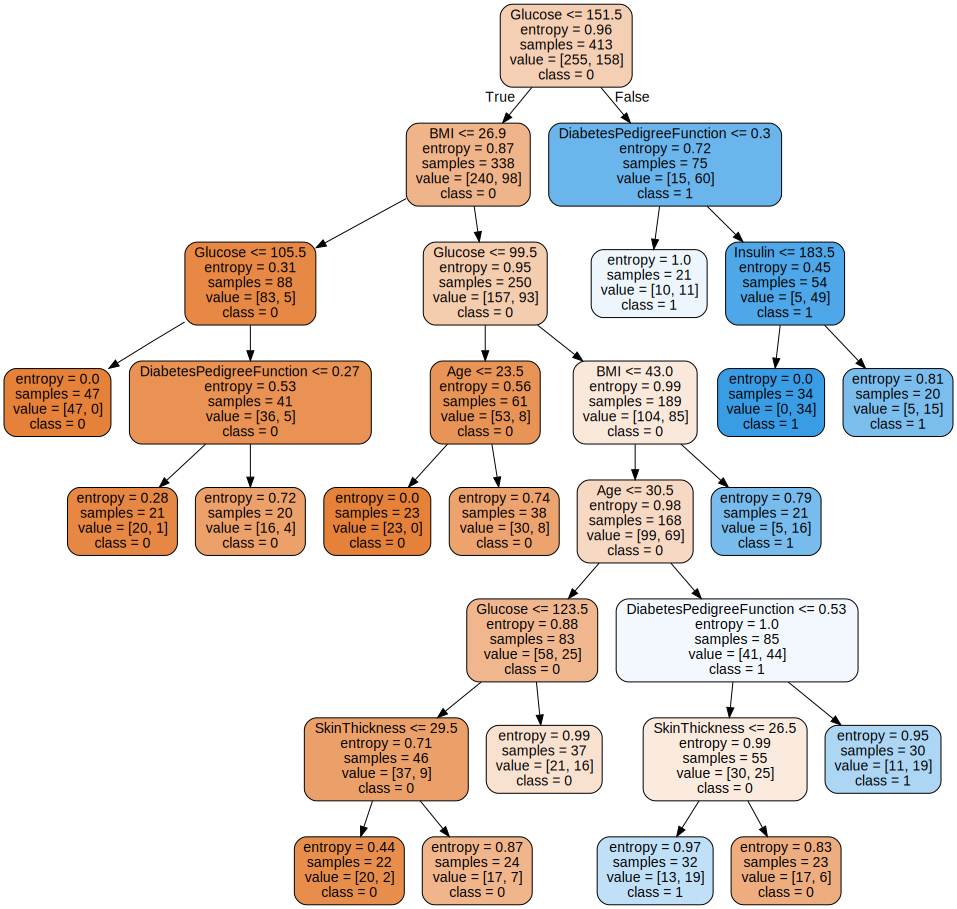

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)


Выводим глубину дерева:

In [ ]:
clf.tree_.max_depth

7

Выполняем предсказание для объектов из тестовой выборки:

In [ ]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

Доля правильных ответов классификатора:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7909604519774012


Выполним предсказание для конкретного объекта (с индексом 708) исходных данных:


In [ ]:
df.loc[708, features]

Pregnancies                   9.000
Glucose                     164.000
BloodPressure                78.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          32.800
DiabetesPedigreeFunction      0.148
Age                          45.000
Name: 708, dtype: float64

Назначенный класс:

In [ ]:
clf.predict([df.loc[708, features].tolist()])[0]

1

Полученный класс соответствует данным из датасета. Таким образом, обученный нами классификатор верно выявляет диабет у пациентов с вероятностью в 79%, задача машинного обучения решена успешно.
